# Insurance Forecast by using Linear Regression

## Challenge

* An insurance provider in United States wants to estimate the insurance cost of an individual given certain factors.
* In United States, it is often mandatory to inform the insurance provider about the ailments, BMI, whether a person is smoker or not, number of dependents, the region that they belong to, etc.
* Your job as a data scientist is to figure out, which factors end up costing more to the insurance providers.

## Data description

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

## Business Metrics

* Minimise the cost incurred on the insurance provider.
* Understand risky customers.

## Step 1: Setup and Data Preparation:
- Import necessary libraries such as `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.  
- Load the dataset for regression analysis.  
- Conduct exploratory data analysis (EDA) to understand the dataset.  
- Preprocess the data by handling missing values, encoding categorical variables, and normalizing/standardizing features if needed.  

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Reading the file
df = pd.read_csv("insurance.csv")

In [ ]:
# Information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Checking for Null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
#Checking for duplicates
duplicated = df[df.duplicated()]
print(duplicated)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [ ]:
#Checking whether the same row is dupliacted and look at the other row which is same
df.loc[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
#Dropping the duplicated row
df.drop_duplicates(keep='last', inplace=True)

In [ ]:
#Checking whether the duplicated row has been dropped
df.loc[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
#Having the statistical insight of the dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


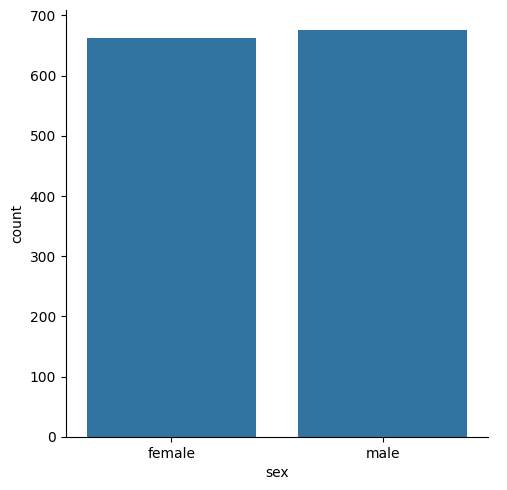

In [ ]:
#Working with categorical data
sns.catplot(df, x="sex", kind="count")

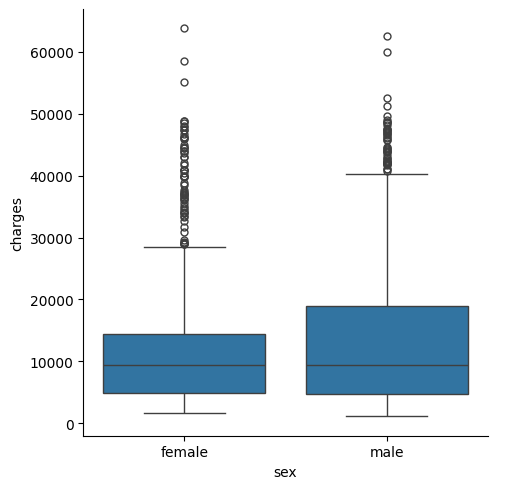

In [ ]:
#Checking the categorical feature with a numericall feature
sns.catplot(df, x="sex", y="charges", kind="box")

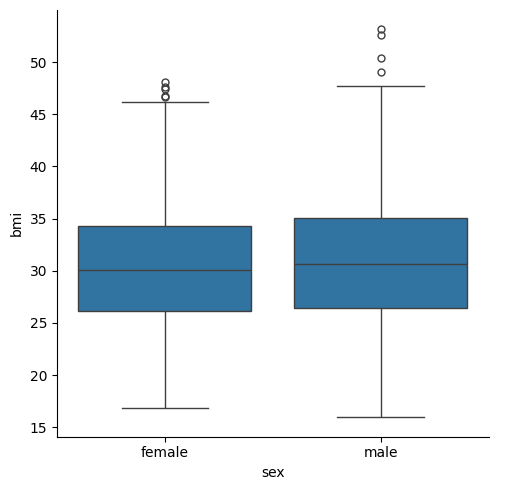

In [ ]:
sns.catplot(df, x="sex", y="bmi", kind="box")

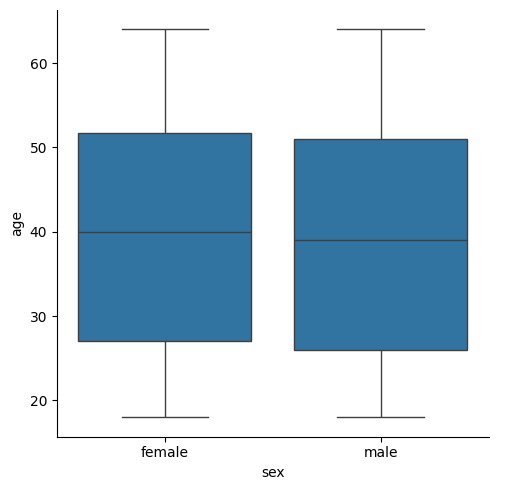

In [ ]:
sns.catplot(df, x="sex", y="age", kind="box")

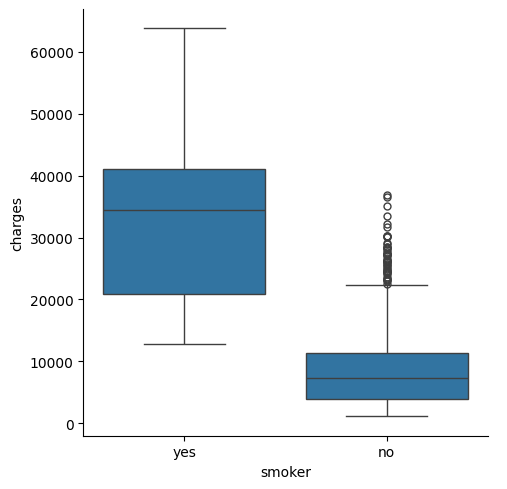

In [ ]:
sns.catplot(df, x="smoker", y="charges", kind="box")

* The smokers are paying a higher insurance cost than the non-smokers. Though the non-smokers are paying a lower insurance cost, some individuals are paying higer insurance cost, indicating that they might have some other ailments.

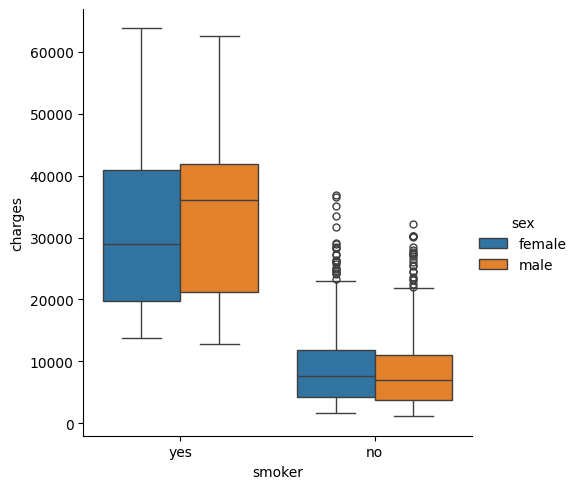

In [ ]:
sns.catplot(df, x="smoker", y="charges", hue="sex", kind="box")

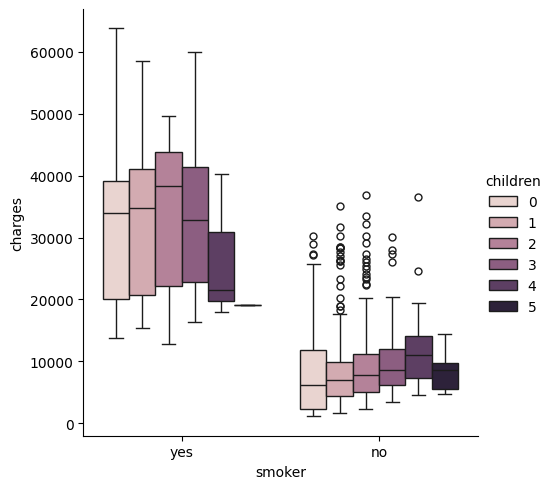

In [ ]:
sns.catplot(df, x="smoker", y="charges", hue="children", kind="box")

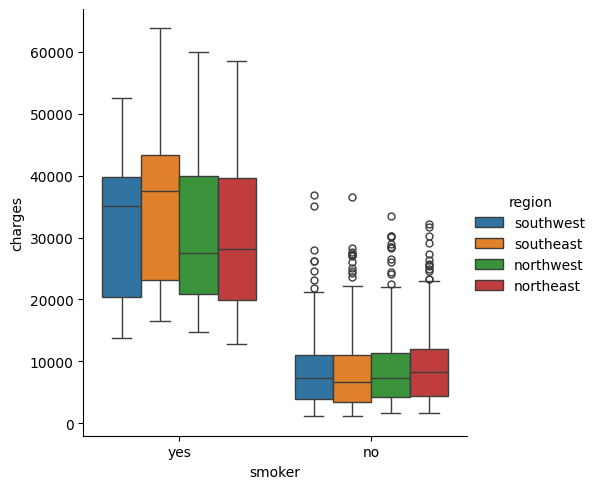

In [ ]:
sns.catplot(df, x="smoker", y="charges", hue="region", kind="box")

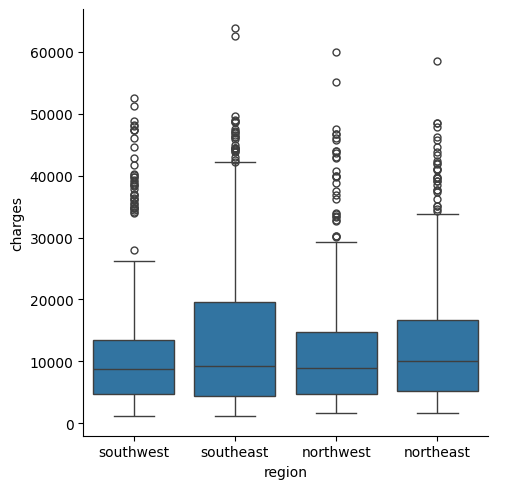

In [ ]:
sns.catplot(df, x="region", y="charges", kind="box")

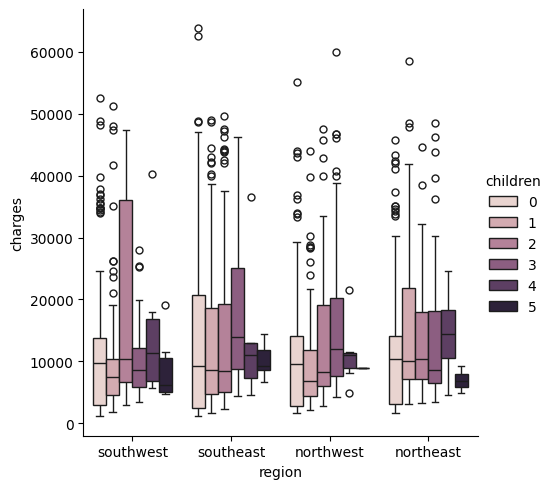

In [ ]:
sns.catplot(df, x="region", y="charges", hue="children", kind="box")

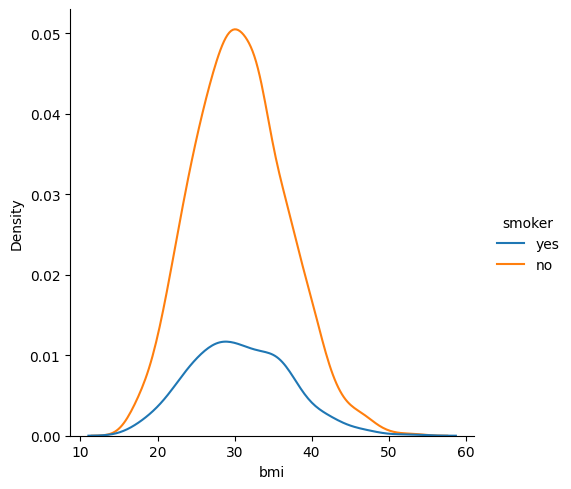

In [ ]:
sns.displot(df, x="bmi", hue="smoker", kind="kde")


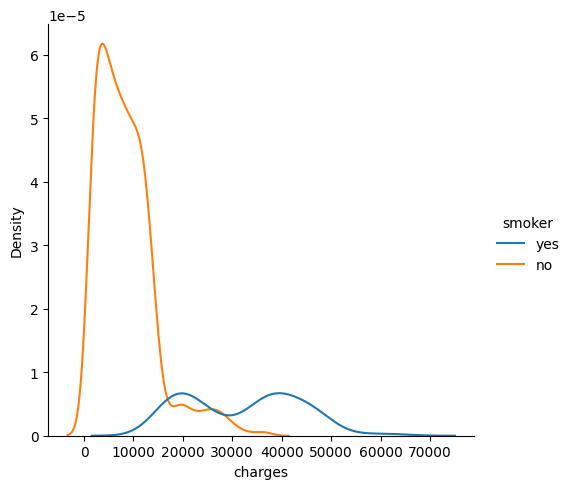

In [ ]:
sns.displot(df, x="charges", hue="smoker", kind="kde")

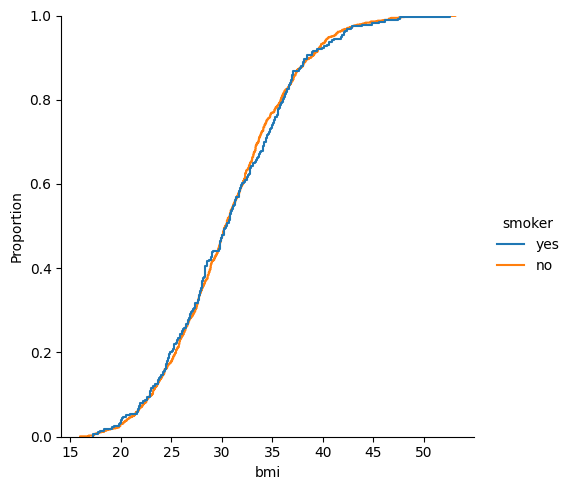

In [ ]:
sns.displot(df, x="bmi", hue="smoker", kind="ecdf")

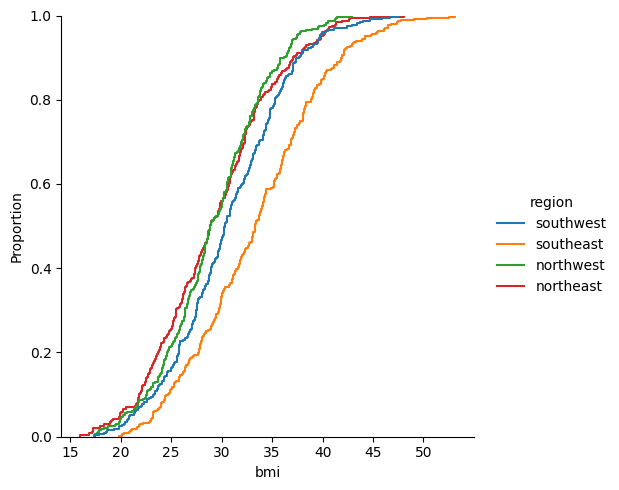

In [ ]:
sns.displot(df, x="bmi", hue="region", kind="ecdf")

<Axes: xlabel='age', ylabel='charges'>

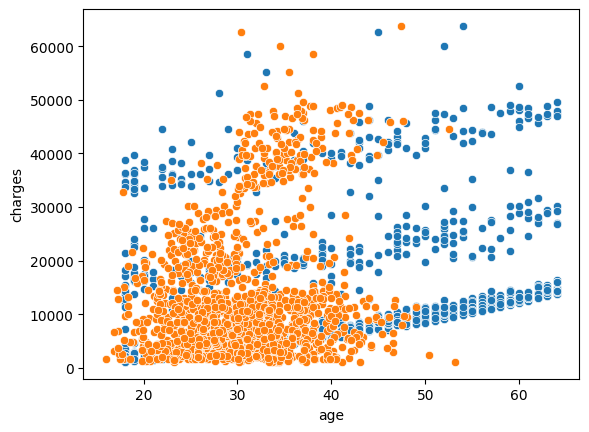

In [ ]:
sns.scatterplot(data=df, x="age", y="charges")
sns.scatterplot(data=df, x="bmi", y="charges")


<Axes: xlabel='age', ylabel='charges'>

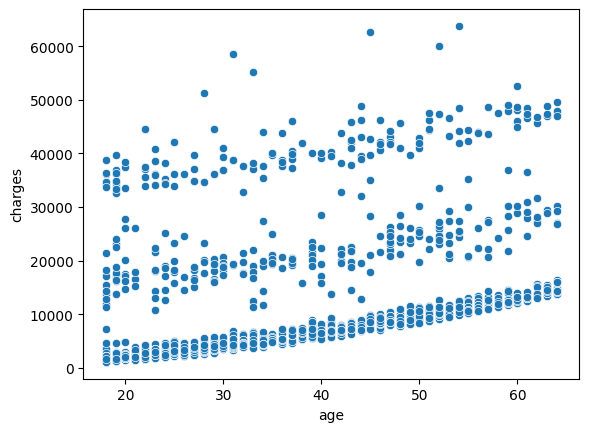

In [ ]:
sns.scatterplot(data=df, x="age", y="charges")

<Axes: xlabel='smoker', ylabel='charges'>

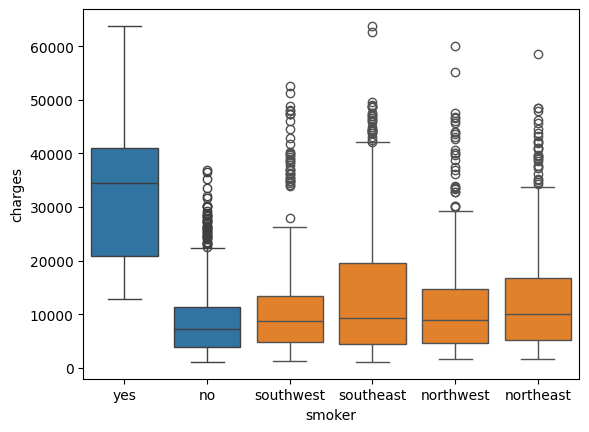

In [ ]:
sns.boxplot(data=df, x="smoker", y="charges")
sns.boxplot(data=df, x="region", y="charges")


<Axes: xlabel='age', ylabel='charges'>

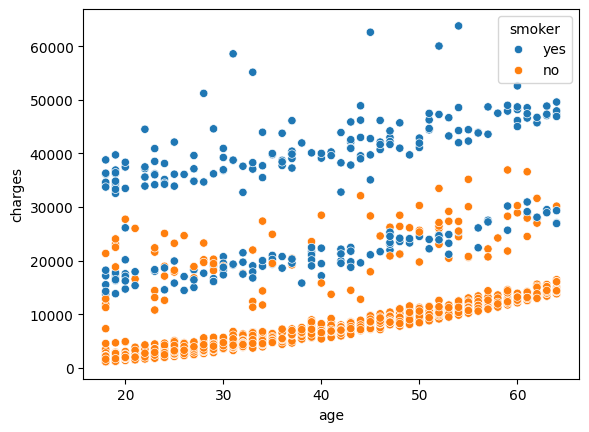

In [ ]:
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")


<Axes: xlabel='bmi', ylabel='charges'>

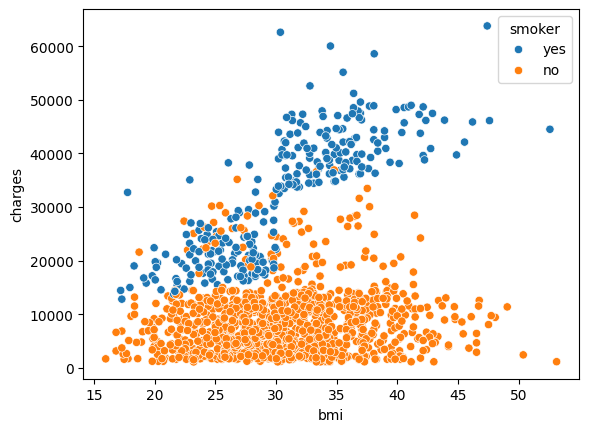

In [ ]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")


<Axes: >

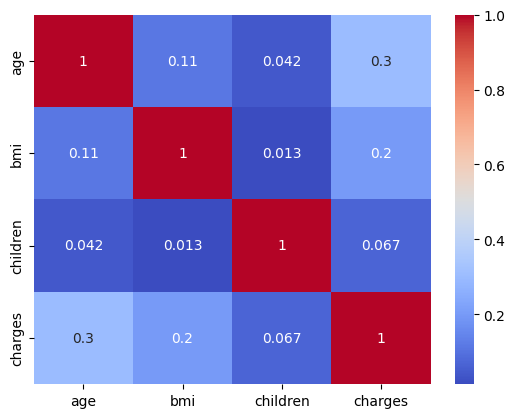

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")



---




**Initial EDA Ends Here**



---



In Step 1, the sub-step 1 is   - Preprocess the data by handling missing values, encoding categorical variables, and normalizing/standardizing features if needed.

In [ ]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Sub-step 2 - Encode categorical variables
Use one-hot encoding to convert sex, smoker, and region into numeric form:

This avoids the dummy variable trap and prepares the data for regression.

In [ ]:
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"])


In [ ]:
display(df_encoded.head())
display(df_encoded.info())

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_female        1337 non-null   bool   
 5   sex_male          1337 non-null   bool   
 6   smoker_no         1337 non-null   bool   
 7   smoker_yes        1337 non-null   bool   
 8   region_northeast  1337 non-null   bool   
 9   region_northwest  1337 non-null   bool   
 10  region_southeast  1337 non-null   bool   
 11  region_southwest  1337 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 62.7 KB


None

Sub-Step 3:  Normalize or standardize features (optional)
This is useful if:

You’re using regularized models (like Ridge or Lasso)

Features are on very different scales (e.g., age vs charges)

Use StandardScaler:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop("charges", axis=1))
X = pd.DataFrame(scaled_features, columns=df_encoded.drop("charges", axis=1).columns)
y = df_encoded["charges"]


In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,1.009771,-1.009771,-1.969660,1.969660,-0.565546,-0.565546,-0.611638,1.764609
1,-1.511647,0.509422,-0.079442,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
2,-0.799350,0.383155,1.580143,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
3,-0.443201,-1.305052,-0.909234,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
4,-0.514431,-0.292456,-0.909234,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.767704,0.050269,1.580143,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
1333,-1.511647,0.206053,-0.909234,1.009771,-1.009771,0.507702,-0.507702,1.768203,-0.565546,-0.611638,-0.566698
1334,-1.511647,1.014490,-0.909234,1.009771,-1.009771,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
1335,-1.297958,-0.797524,-0.909234,1.009771,-1.009771,0.507702,-0.507702,-0.565546,-0.565546,-0.611638,1.764609


**2. Simple Linear Regression:**




---


- Train a Simple Linear Regression model using the selected variables.  
- Visualize the regression line on a scatter plot to show the relationship between the predictor and response variable.  


In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# Scale the features (X)
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

# No need to scale the target variable (y) for linear regression
y_train_scaled = y_train
y_test_scaled = y_test

In [ ]:
X_train_scaled

array([[ 1.06648766,  0.20185762,  1.56793412, ..., -0.57776193,
         1.61556139, -0.57282196],
       [ 1.13815404,  0.38529239, -0.90705474, ..., -0.57776193,
         1.61556139, -0.57282196],
       [-1.22683639, -0.31175975, -0.90705474, ..., -0.57776193,
         1.61556139, -0.57282196],
       ...,
       [-1.37016914, -1.44905535, -0.08205845, ..., -0.57776193,
        -0.61897988,  1.74574312],
       [-0.08017436, -0.44850203,  1.56793412, ..., -0.57776193,
        -0.61897988,  1.74574312],
       [-0.29517349,  0.8622228 ,  0.74293783, ..., -0.57776193,
         1.61556139, -0.57282196]])

**STEP 3. Multiple Linear Regression:**



---


- Select multiple independent variables (predictors) and one dependent variable (response).  
- Train a Multiple Linear Regression model using the selected features.  
- Analyze the regression coefficients to understand the impact of each predictor on the response variable.


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train_scaled)
train_score = reg.score(X_train_scaled, y_train_scaled)

In [ ]:
test_score = reg.score(X_test_scaled, y_test_scaled)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.7415933390033047
Test score: 0.7640665675492984


**Next Step** - Analyze the regression coefficients to understand the impact of each predictor on the response variable.

In [ ]:
#coefficients analysis
feature_names = X_train.columns

coefs = pd.DataFrame(
    reg.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
age,3455.523759
bmi,2024.016725
children,742.148486
sex_female,40.865893
sex_male,-40.865893
smoker_no,-4708.396061
smoker_yes,4708.396061
region_northeast,287.541690
region_northwest,143.345353
region_southeast,-289.941954


In [ ]:
coefs_sorted = coefs.sort_values(by="Coefficients", ascending=False)
print(coefs_sorted)


                  Coefficients
smoker_yes         4708.396061
age                3455.523759
bmi                2024.016725
children            742.148486
region_northeast    287.541690
region_northwest    143.345353
sex_female           40.865893
sex_male            -40.865893
region_southwest   -121.809485
region_southeast   -289.941954
smoker_no         -4708.396061


age → If the coefficient is positive, older individuals are associated with higher charges.

bmi → A positive coefficient means higher BMI leads to higher charges (consistent with health risk).

children → If small or near zero, number of children doesn’t strongly affect charges.

smoker_yes → This is usually the largest positive coefficient — smoking drastically increases charges.

**Next Step - OLS Regression**

sm.add_constant → adds the intercept term (β₀) to the regression.
sm.OLS(...).fit() → fits an Ordinary Least Squares regression.
.summary() → gives a rich statistical report, including:
Coefficients (β values)
Standard errors
t‑statistics and p‑values (significance of predictors)
R² and Adjusted R²
F‑statistic (overall model significance)
Confidence intervals

In [ ]:
import statsmodels.api as sm # This line imports the statsmodels library, which is commonly used for statistical modeling,
#including detailed regression analysis.

# Add a constant (intercept) to the model
# In linear regression, an intercept term (often denoted as β₀) is usually included in the model.
# This line adds a constant column of ones to your training feature data (X_train_scaled)
X_train_const = sm.add_constant(X_train_scaled)


# Fit the OLS model
# This creates an OLS model object. It takes the target variable (y_train) and the feature data with the added constant (X_train_const) as input.
# .fit(): This method fits the OLS model to the provided data

ols_model = sm.OLS(y_train, X_train_const).fit()

# Print the summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     332.2
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          5.40e-266
Time:                        15:45:27   Log-Likelihood:                -9452.5
No. Observations:                 935   AIC:                         1.892e+04
Df Residuals:                     926   BIC:                         1.897e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.315e+04    195.446     67.281      0.0

**How to interpret OLS Regression**
Coefficients → direction and magnitude of each predictor’s effect on charges.
p‑values → check which predictors are statistically significant (commonly p < 0.05).
R² /
F‑statistic → whether the model as a whole is significant.

Model Fit
R-squared = 0.742 → About 74% of the variation in charges is explained by your predictors.

Adj. R-squared = 0.739 → Adjusted for number of predictors; still strong, so your model isn’t just overfitting.

F-statistic = 332.2, Prob(F) ≈ 0.000 → The model as a whole is highly significant (at least one predictor matters).


---


**INTERPRETATION >**

The model explains ~74% of the variation in medical charges — a strong fit.

Smoking status, age, and BMI are the most impactful predictors.

Some variables (like certain regions or sex) are not statistically significant.
There may be multicollinearity due to dummy variables, but the main drivers are clear.

Residuals are not perfectly normal, but the model is still valid for inference.

OLS regression confirms that smoking, age, and BMI are the dominant drivers of insurance charges, while other factors like region or sex have little to no significant effect.



---





**NEXT TASK - Perform > Model Evaluation:**


---


- Calculate evaluation metrics for both Simple and Multiple Linear Regression models:  
  - Mean Squared Error (MSE)  
  - Mean Absolute Error (MAE)  
  - R-squared (R²)  
  - Adjusted R-squared (Adjusted R²)  
- Compare the performance of both models and justify the results.


In [ ]:
#model evaluation for SIMPLE LINEAR REGRESSION & MULTIPLE LINEAR REGRESSION

# mports the necessary functions from scikit-learn's metrics module
# to calculate common regression evaluation metrics:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# he code converts the scaled NumPy arrays
#(X_train_scaled and X_test_scaled) back into pandas DataFrames.
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# ---------- SIMPLE LINEAR REGRESSION (example: using only 'bmi') ----------

X_train_simple = X_train_scaled_df[['bmi']]   # choose one predictor - BMI
X_test_simple = X_test_scaled_df[['bmi']]

# A new LinearRegression model is trained using only the scaled 'bmi' feature
simple_reg = LinearRegression().fit(X_train_simple, y_train)

# Predictions are made on the test set using this simple model.
y_pred_train_simple = simple_reg.predict(X_train_simple)
y_pred_test_simple = simple_reg.predict(X_test_simple)

# Metrics calculation for Simple Regression - mean squared and mean absolute err
mse_simple = mean_squared_error(y_test, y_pred_test_simple)
mae_simple = mean_absolute_error(y_test, y_pred_test_simple)
r2_simple = r2_score(y_test, y_pred_test_simple) # computes the R²
 #(coefficient of determination) between actual and predicted values.



# Adjusted R² for Simple Regression (often not calculated for simple linear reg)
# We will calculate it for consistency but interpret with caution.
# The line extracts the number of rows (n) and predictors (k)
# from simple regression test set,
n, k = X_test_simple.shape

# this code calculates the Adjusted R² for the simple model using the formula:
# 1 - (1-R²) * (n-1)/(n-k-1), where n is the number of observations and
# k is the number of predictors (in this case, k=1 for simple regression).

adj_r2_simple = 1 - (1-r2_simple) * (n-1)/(n-k-1)


# ---------- MULTIPLE LINEAR REGRESSION (all predictors) ----------

# The original multiple linear regression model (trained on all scaled features)
# is fitted again for evaluation purposes within this cell's scope.
multi_reg = LinearRegression().fit(X_train_scaled, y_train)

#  Predictions are made on the test set using the multiple regression model.
y_pred_train_multi = multi_reg.predict(X_train_scaled)
y_pred_test_multi = multi_reg.predict(X_test_scaled)

# Caclculate the required Metrics for Multiple Regression
mse_multi = mean_squared_error(y_test, y_pred_test_multi)
mae_multi = mean_absolute_error(y_test, y_pred_test_multi)
r2_multi = r2_score(y_test, y_pred_test_multi)


# Adjusted R² is calculated for the multiple regression model
n, k = X_test_scaled.shape
adj_r2_multi = 1 - (1-r2_multi) * (n-1)/(n-k-1)


# ---------- Print Results ----------
print("SIMPLE LINEAR REGRESSION (BMI only)")
print("MSE:", mse_simple)
print("MAE:", mae_simple)
print("R²:", r2_simple)
print("Adjusted R²:", adj_r2_simple)
print("\nMULTIPLE LINEAR REGRESSION (All predictors)")
print("MSE:", mse_multi)
print("MAE:", mae_multi)
print("R²:", r2_multi)
print("Adjusted R²:", adj_r2_multi)

SIMPLE LINEAR REGRESSION (BMI only)
MSE: 158439212.18148443
MAE: 9297.786517704846
R²: 0.06194083571599973
Adjusted R²: 0.05959568780528968

MULTIPLE LINEAR REGRESSION (All predictors)
MSE: 39849413.115957156
MAE: 4209.191711184477
R²: 0.7640665675492984
Adjusted R²: 0.7574120348391504


**Interpretation**
1. Simple Linear Regression (BMI only)
R² = 0.06 → BMI alone explains only ~6% of the variation in charges.

High errors (MSE, MAE) → Predictions are far off from actual charges.

**Conclusion: BMI is a weak standalone predictor. It matters, but not enough by itself.**

2. Multiple Linear Regression (All predictors)
R² = 0.76 → The model explains ~76% of the variation in charges.

Adjusted R² = 0.757 → Even after accounting for multiple predictors, the model remains strong (not just overfitting).

Errors (MSE, MAE) are much lower → Predictions are far closer to reality.

Conclusion: Including age, smoker status, children, sex, and region dramatically improves predictive power.

**Justification of Results**
Charges are influenced by multiple factors simultaneously — not just BMI.

Smoking status, age, and BMI are the dominant drivers, while other features add incremental explanatory power.

The multiple regression model is far superior: lower errors, much higher R², and still robust after adjustment.

**This aligns with real-world intuition: insurance charges depend on lifestyle (smoking), health (BMI), demographics (age, children), and region.**

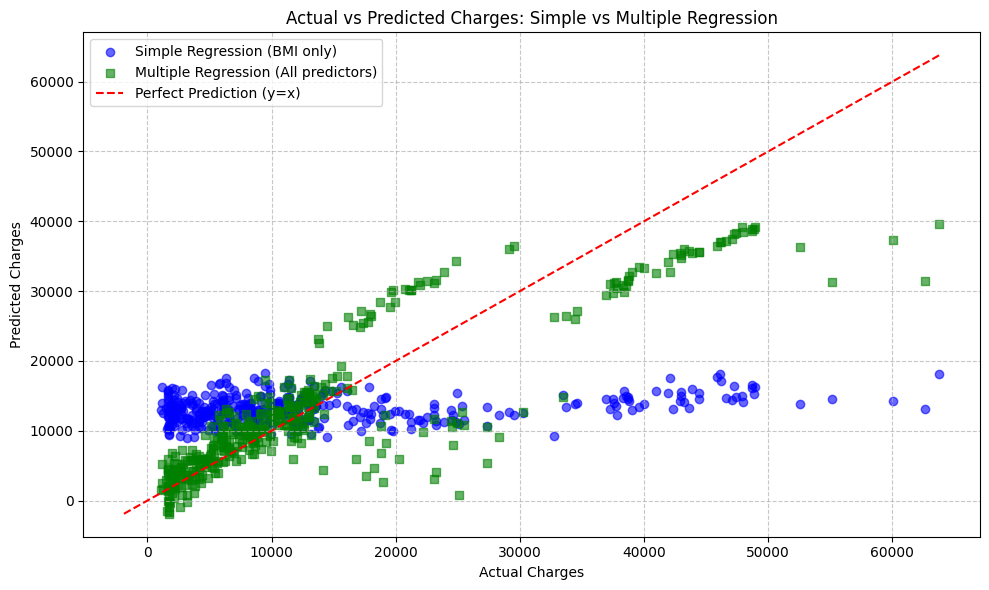

In [ ]:
#Visual Comparison of 2 models

import matplotlib.pyplot as plt
import numpy as np

#-- SCATTER PLOT: Actual vs Predicted ---

plt.figure(figsize=(10,6))

# Simple Regression predictions
plt.scatter(y_test, y_pred_test_simple, alpha=0.6, color="blue", label="Simple Regression (BMI only)", marker="o")

# Multiple Regression predictions
plt.scatter(y_test, y_pred_test_multi, alpha=0.6, color="green", label="Multiple Regression (All predictors)", marker="s")

# Perfect prediction line
min_val = min(y_test.min(), y_pred_test_simple.min(), y_pred_test_multi.min())
max_val = max(y_test.max(), y_pred_test_simple.max(), y_pred_test_multi.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", label="Perfect Prediction (y=x)")

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges: Simple vs Multiple Regression")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


The **green points (Multiple Regression) cluster much closer** to the red dashed  line (perfect prediction), showing that the model with all predictors estimates charges far more accurately.

The **blue points (Simple Regression, BMI only) are widely scattered,** showing poor predictive power when relying on a single variable.

**“The scatter plot shows that Multiple Linear Regression predicts charges far more accurately than Simple Regression, with predictions closely aligning to actual values.”**

**NEXT TASK > 5. Residual Analysis:**
- Perform residual analysis to validate the assumptions of Linear Regression:  
  - Linearity  
  - Homoscedasticity (constant variance)  
  - Independence of errors  
  - Normality of residuals  


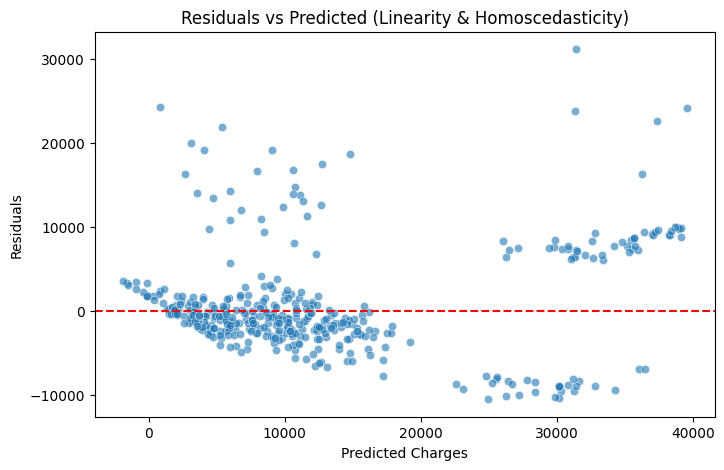

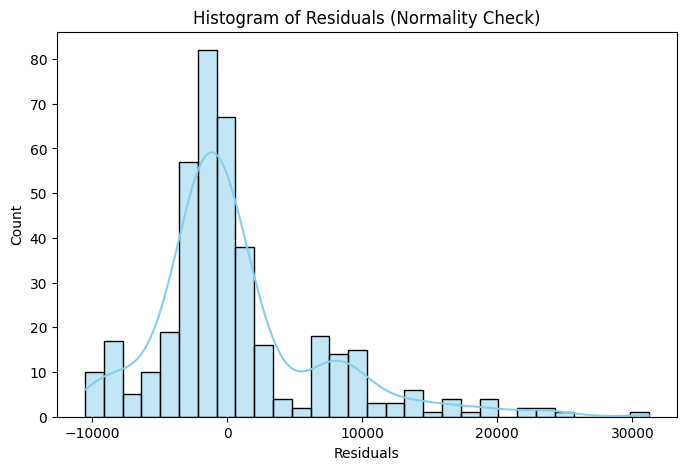

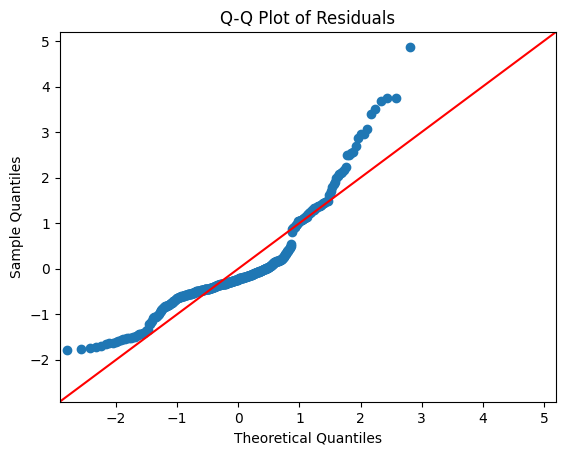

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Predictions and residuals from multiple regression
y_pred = multi_reg.predict(X_test_scaled)
residuals = y_test - y_pred

# 1 & 2. Linearity + Homoscedasticity
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Linearity & Homoscedasticity)")
plt.show()

# 3. Normality of residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30, color="skyblue")
plt.title("Histogram of Residuals (Normality Check)")
plt.xlabel("Residuals")
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 4. Independence of errors (Durbin-Watson)
ols_model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
# print("Durbin-Watson statistic:", ols_model.durbin_watson) # Removed the line causing the error

**Scatter Plot - Linearity + Homoscedasticity**

There seems to be a pattern in the residuals (not purely random).
The spread of residuals increases as predicted charges get larger → this is called heteroscedasticity.

This means:
The model fits low/medium charges reasonably well.
But for high charges, errors get larger and less consistent.
**This is common in medical cost data because a few patients have extremely high charges (outliers) that are hard to predict with a simple linear model.**

The residual plot shows signs of heteroscedasticity — the model struggles more with high charges — and a log transform of the target is a common fix.

**Histogram**

If residuals were perfectly normal, you’d see a symmetric bell curve. But this is not the case here. We see right skew (a long tail) because a few patients have extremely high charges.

**Q-Q-Plot**

Plots residual quantiles against a theoretical normal distribution.
If residuals are normal, points fall along the 45° line, which is not the case here!!

**Deviations on this plot at the ends (tails) show skewness/outliers.**





---








**NEXT TASK > 6. Model Optimization:**



---


- Identify and remove irrelevant or highly correlated predictors to improve the model's performance.  
- Assess the impact of feature selection on the R-squared and Adjusted R-squared values.  


**Step 1: Check Multicollinearity (VIF)**



---



In [ ]:
# use Variance Inflation Factor (VIF) to detect highly correlated predictors. A VIF > 10 usually signals multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd # Import pandas

# Convert the scaled NumPy array back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calculate VIF for each feature
X_with_const = sm.add_constant(X_train_scaled_df) # Use the DataFrame with columns
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled_df.columns # Use DataFrame columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i+1)
                   for i in range(len(X_train_scaled_df.columns))] # Use DataFrame columns length

print(vif_data)

             Feature       VIF
0                age  1.015574
1                bmi  1.121895
2           children  1.003701
3         sex_female       inf
4           sex_male       inf
5          smoker_no       inf
6         smoker_yes       inf
7   region_northeast       inf
8   region_northwest       inf
9   region_southeast       inf
10  region_southwest       inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


**Interpreting the VIF Output**
age, bmi, children → VIF ≈ 1 → **No multicollinearity.** These predictors are independent and safe to keep.

sex_female, sex_male, smoker_no, smoker_yes, region_* → VIF = inf (infinity) →  **Perfect multicollinearity.**

It’s not a bug in statsmodels — it’s telling you that perfect multicollinearity exists in your predictors.

NOTE - All dummy variables for categorical features (e.g., both sex_female and sex_male), one column is a perfect linear combination of the others. → That makes
(Ri)Square -> 1
, so the denominator becomes zero. → Python throws a RuntimeWarning: divide by zero and reports VIF as inf.


The infinite VIF values are a red flag that you need to drop one dummy variable per category (set a baseline).

**Step 2: Remove Irrelevant / High-VIF Predictors**


---


Drop predictors with very high VIF (multicollinearity).
Drop predictors with insignificant p-values (from OLS summary, e.g., sex, some regions).

In [ ]:
# Drop one dummy variable from each category to address multicollinearity
# Based on VIF and OLS summary, sex_male, smoker_no, and region_southwest are good candidates to drop as baselines.
X_optimized = X.drop(columns=['sex_male', 'smoker_no', 'region_southwest'])

# Verify the columns in the optimized feature set
print("Optimized features:")
print(X_optimized.columns)




Optimized features:
Index(['age', 'bmi', 'children', 'sex_female', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast'],
      dtype='object')


**Step 3 : Split the Optimized data in training and testing sets**



---



In [ ]:
# Now, split the optimized data into training and testing sets again
from sklearn.model_selection import train_test_split
X_train_optimized, X_test_optimized, y_train, y_test = train_test_split(X_optimized, y, test_size=0.3, random_state=42)

**Step 4 : Scale the optimized features**



---



In [ ]:
# Scale the optimized features
from sklearn.preprocessing import StandardScaler
std_scaler_optimized = StandardScaler()

X_train_optimized_scaled = std_scaler_optimized.fit_transform(X_train_optimized)
X_test_optimized_scaled = std_scaler_optimized.transform(X_test_optimized)

**Step 5: Retrain the Linear regression model**


---



In [ ]:
# Retrain the linear regression model with the optimized features
from sklearn.linear_model import LinearRegression
optimized_reg = LinearRegression().fit(X_train_optimized_scaled, y_train)

# Evaluate the optimized model
y_pred_train_optimized = optimized_reg.predict(X_train_optimized_scaled)
y_pred_test_optimized = optimized_reg.predict(X_test_optimized_scaled)


**Step 6: Check the metrics for Optimized Regression**



---



In [ ]:
# Metrics for Optimized Regression
mse_optimized = mean_squared_error(y_test, y_pred_test_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_test_optimized)
r2_optimized = r2_score(y_test, y_pred_test_optimized)

# Adjusted R² for Optimized Regression
n_opt, k_opt = X_test_optimized_scaled.shape
adj_r2_optimized = 1 - (1-r2_optimized) * (n_opt-1)/(n_opt-k_opt-1)

# Print results for the optimized model
print("\nOPTIMIZED MULTIPLE LINEAR REGRESSION")
print("MSE:", mse_optimized)
print("MAE:", mae_optimized)
print("R²:", r2_optimized)
print("Adjusted R²:", adj_r2_optimized)

# Compare with the original multiple linear regression results
print("\nORIGINAL MULTIPLE LINEAR REGRESSION (for comparison)")
print("MSE:", mse_multi)
print("MAE:", mae_multi)
print("R²:", r2_multi)
print("Adjusted R²:", adj_r2_multi)


OPTIMIZED MULTIPLE LINEAR REGRESSION
MSE: 39849413.115957186
MAE: 4209.191711184479
R²: 0.7640665675492981
Adjusted R²: 0.7592638513670955

ORIGINAL MULTIPLE LINEAR REGRESSION (for comparison)
MSE: 39849413.115957156
MAE: 4209.191711184477
R²: 0.7640665675492984
Adjusted R²: 0.7574120348391504


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # Import seaborn

# Performance metrics from previous output
metrics = {
    'Metric': ['MSE', 'MAE', 'R²', 'Adjusted R²'],
    'Original Multiple Regression': [mse_multi, mae_multi, r2_multi, adj_r2_multi],
    'Optimized Multiple Regression': [mse_optimized, mae_optimized, r2_optimized, adj_r2_optimized]
}

df_metrics = pd.DataFrame(metrics)

# Reshape for plotting (removed plotting code)
# df_metrics_melted = df_metrics.melt(id_vars='Metric', var_name='Model', value_name='Value')

# Create grouped bar chart (removed plotting code)
# plt.figure(figsize=(12, 7))
# sns.barplot(x='Metric', y='Value', hue='Model', data=df_metrics_melted, palette='viridis')

# plt.title('Comparison of Model Performance Metrics')
# plt.ylabel('Value')
# plt.xlabel('Metric')
# plt.legend(title='Model')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# Display the metrics in a table
print("Performance Metrics Comparison Table:")
display(df_metrics)

Performance Metrics Comparison Table:


,Metric,Original Multiple Regression,Optimized Multiple Regression
0,MSE,3.984941e+07,3.984941e+07
1,MAE,4.209192e+03,4.209192e+03
2,R²,7.640666e-01,7.640666e-01
3,Adjusted R²,7.574120e-01,7.592639e-01


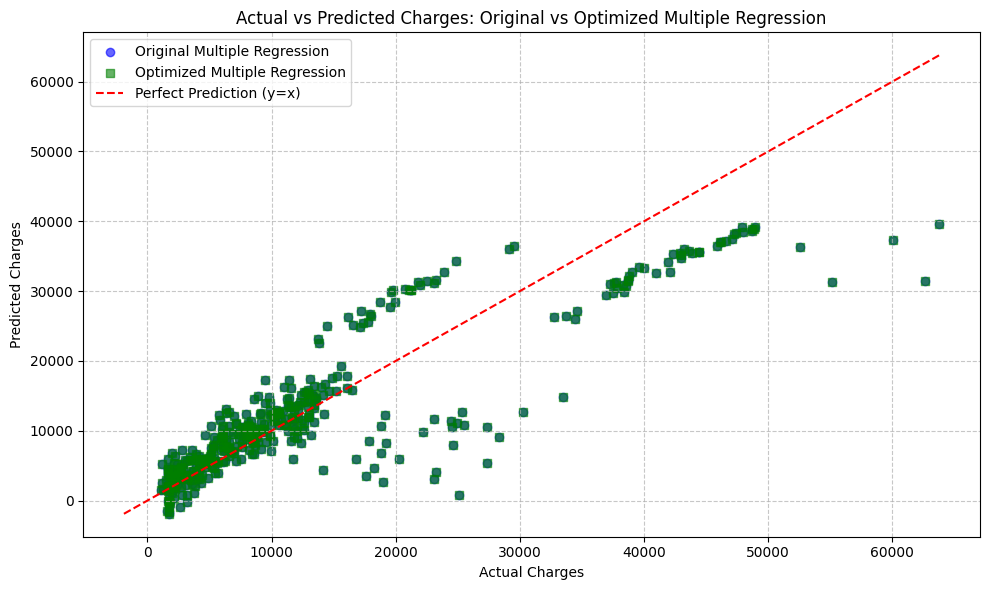

In [ ]:
# Visual Comparison of Original and Optimized Multiple Regression Models

import matplotlib.pyplot as plt
import numpy as np

# Predictions from original and optimized multiple regression models
y_pred_test_original_multi = multi_reg.predict(X_test_scaled)
y_pred_test_optimized_multi = optimized_reg.predict(X_test_optimized_scaled)


# --- SCATTER PLOT: Actual vs Predicted ---

plt.figure(figsize=(10, 6))

# Original Multiple Regression predictions
plt.scatter(y_test, y_pred_test_original_multi, alpha=0.6, color="blue", label="Original Multiple Regression", marker="o")

# Optimized Multiple Regression predictions
plt.scatter(y_test, y_pred_test_optimized_multi, alpha=0.6, color="green", label="Optimized Multiple Regression", marker="s")

# Perfect prediction line
min_val = min(y_test.min(), y_pred_test_original_multi.min(), y_pred_test_optimized_multi.min())
max_val = max(y_test.max(), y_pred_test_original_multi.max(), y_pred_test_optimized_multi.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", label="Perfect Prediction (y=x)")

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges: Original vs Optimized Multiple Regression")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Assess the impact of feature selection on R-squared and Adjusted R-squared

print("Impact of Feature Selection on R-squared and Adjusted R-squared:")
print("-" * 60)

# Original Model Metrics (from previous output)
print(f"Original Multiple Regression R²: {r2_multi:.4f}")
print(f"Original Multiple Regression Adjusted R²: {adj_r2_multi:.4f}")

print("-" * 60)

# Optimized Model Metrics (from previous output)
print(f"Optimized Multiple Regression R²: {r2_optimized:.4f}")
print(f"Optimized Multiple Regression Adjusted R²: {adj_r2_optimized:.4f}")

print("-" * 60)

# Calculate the change in metrics
r2_change = r2_optimized - r2_multi
adj_r2_change = adj_r2_optimized - adj_r2_multi

print(f"Change in R²: {r2_change:.4f}")
print(f"Change in Adjusted R²: {adj_r2_change:.4f}")

# Interpretation
if adj_r2_change > 0.001: # Use a small threshold for noticeable change
    print("\nInterpretation: Feature selection slightly improved the Adjusted R-squared, indicating a marginally better model fit after removing less impactful predictors.")
elif adj_r2_change < -0.001:
     print("\nInterpretation: Feature selection slightly decreased the Adjusted R-squared, suggesting the removed predictors might have contributed positively despite multicollinearity.")
else:
    print("\nInterpretation: Feature selection had a negligible impact on R-squared and Adjusted R-squared. The model's explanatory power remained largely the same after removing predictors.")

Impact of Feature Selection on R-squared and Adjusted R-squared:
------------------------------------------------------------
Original Multiple Regression R²: 0.7641
Original Multiple Regression Adjusted R²: 0.7574
------------------------------------------------------------
Optimized Multiple Regression R²: 0.7641
Optimized Multiple Regression Adjusted R²: 0.7593
------------------------------------------------------------
Change in R²: -0.0000
Change in Adjusted R²: 0.0019

Interpretation: Feature selection slightly improved the Adjusted R-squared, indicating a marginally better model fit after removing less impactful predictors.


**Summary of Findings:**

Data Overview: The dataset contained information on insurance charges and several factors including age, sex, BMI, number of children, smoking status, and region. There were no missing values, and a single duplicate row was identified and removed.

**Exploratory Data Analysis (EDA):**
Visualizations showed that smoker had the most significant impact on charges, with smokers having substantially higher insurance costs.
age and bmi also showed positive correlations with charges.
sex and region appeared to have less impact on the charges compared to smoking, age, and BMI.

**Model Building and Evaluation:**
A Simple Linear Regression model using only bmi as a predictor performed poorly (low R² = 0.06), indicating that BMI alone is not a strong predictor of charges.
A Multiple Linear Regression model using all predictors achieved a much higher R² of 0.76, explaining about 76% of the variance in insurance charges.
The coefficients from the multiple regression model confirmed that smoker_yes had the largest positive impact on charges, followed by age and bmi. children also had a positive impact, while sex and some region dummy variables were not statistically significant.

**Residual Analysis:**
The residual plots indicated some issues with the assumptions of linear regression, specifically heteroscedasticity (the spread of residuals increased with higher predicted charges) and non-normality of residuals (a right skew). This is often seen in medical cost data due to high-cost outliers.

**Model Optimization:**
VIF analysis revealed perfect multicollinearity among the dummy variables for categorical features.
By removing one dummy variable from each category (sex_male, smoker_no, region_southwest), multicollinearity was addressed.

Comparing the original and optimized multiple regression models showed a slight improvement in the Adjusted R² (from 0.7574 to 0.7593), while other metrics remained largely unchanged. This suggests the removal of less impactful predictors helped refine the model slightly.

**Conclusion:**

The analysis strongly indicates that smoking status is the most significant factor in determining insurance charges, followed by age and BMI. While the linear regression model explains a substantial portion of the variance in charges (around 76%), the presence of heteroscedasticity suggests that the model's predictions are less reliable for individuals with very high insurance costs.
Further steps could involve transforming the target variable (e.g., using a log transformation) or exploring more advanced regression techniques to potentially improve the model's performance and address the issues observed in the residual analysis, especially for high-cost predictions.